In [1]:
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image

def plot_core_periphery_graph(G, core_indices):
    # Get the node labels (strings) from the graph using the indices
    core_nodes = [list(G.nodes)[i] for i in core_indices]
    
    # Set node color: 'red' for core nodes and 'blue' for periphery nodes
    node_colors = ['red' if node in core_nodes else 'blue' for node in G.nodes]
    
    # Draw the graph
    pos = nx.spring_layout(G)  # spring layout for better visualization
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=10, font_size=0, font_color='white')
    
    # Highlight core nodes with larger size
    nx.draw_networkx_nodes(G, pos, nodelist=core_nodes, node_color='red', node_size=30)
    plt.show()

nodes = pd.read_csv("jean-complete-node.csv")
edges = pd.read_csv("jean-complete-edge.csv")

# 무방향 그래프 생성
G = nx.Graph()

for index, row in nodes.iterrows():
    G.add_node(row['Id'], label=row['Label'], description=row['Description'])

for index, row in edges.iterrows():
    G.add_edge(row['Source'], row['Target'], id=row['Id'], label=row['Label'])

A = nx.to_numpy_array(G)
n = A.shape[0]


In [14]:
from algorithms.ibd import IBD


ibd = IBD(G, A)
core_scores, core_nodes, pairs, c_pairs = ibd.run_influence_based_detection(gamma = 0.6)

print("Core scores:")
print(core_scores)
print("Core nodes:", core_nodes)
print("Core-periphery pairs:", pairs)

Converged after 19 iterations
Core scores:
[ 2.33657628  0.4720933   0.17594581  0.49156285  1.38646087  1.31352234
  1.37969532  0.12469917  0.22281556  2.0561419   0.13001773  0.27833711
  0.12469917  2.00773652  1.62168106  0.1024953   1.02706433  0.10504385
  0.2234929   0.30287572  0.27651581  0.17594581  0.30287572  0.38755593
  0.64374167  6.87876485  0.12469917  0.1007131   0.1638534   0.17594581
  0.47121725  0.88870699  0.51320812  1.20663876  1.00837146  6.72666299
  0.90637302  0.1638534   1.20526789  0.49156285  1.55640798  0.1638534
  0.17594581  0.1638534   1.00837146  0.17594581  1.80561312  2.59545979
  1.80601905  0.70819059  1.23706283  0.56354807  0.12469917  0.19133169
  0.17594581  0.12469917  0.17594581  0.63655505  0.17594581  0.27833711
  0.56207771  0.66252117  0.17594581  0.91504947  1.13010749  1.20663876
  0.13001773  0.17594581  0.17594581  0.35184865  1.09213231  0.47121725
  0.93206187  0.88870699  0.09297427  0.10946654  0.30287572  1.27609954
  2.46914

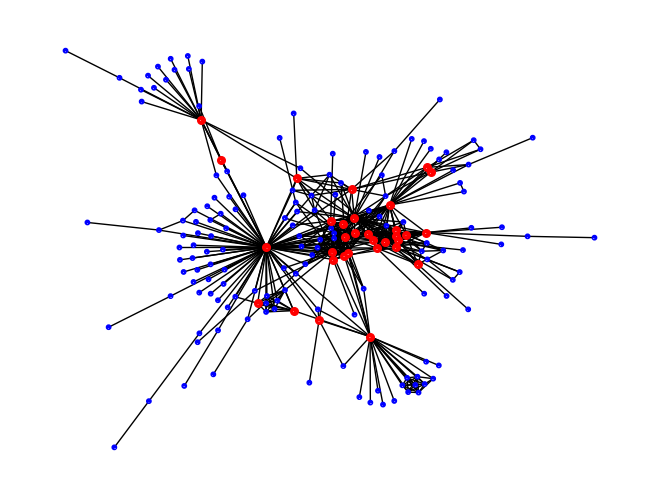

In [15]:
plot_core_periphery_graph(G, core_nodes)